In [ ]:
import os
import cv2

In [ ]:
features=[]
target=[]

In [ ]:
for x in["darkspots","puffyeyes","wrinkles","clear face"]:
    ImagesNamesList=os.listdir("/content/drive/MyDrive/Ageing_signs_dataset" + "/" + str(x))
    for y in ImagesNamesList:
        Imgarr=cv2.imread("/content/drive/MyDrive/Ageing_signs_dataset" + "/" + str(x) + "/" + y)
        try:
            Imgarr=cv2.resize(Imgarr,(244,244))
            features.append(Imgarr)
        except:
            pass
        else:
            if x=="darkspots":
              target.append(0)
            elif x=="puffyeyes":
              target.append(1) 
            elif x=="wrinkles":
               target.append(2)    
            else:
                target.append(3)
    print("In Folder", x)

In Folder darkspots
In Folder puffyeyes
In Folder wrinkles
In Folder clear face


In [ ]:
import numpy as np

In [ ]:
features=np.array(features)
target=np.array(target)

In [ ]:
features.shape

(1596, 244, 244, 3)

In [ ]:
target.shape

(1596,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [ ]:
features_train.shape

(1276, 244, 244, 3)

In [ ]:
target_train.shape

(1276,)

In [ ]:
features_test.shape

(320, 244, 244, 3)

In [ ]:
target_test.shape

(320,)

In [ ]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255

    
    
    return image

In [ ]:
features_train=np.array(list(map(preprocessing,features_train)))

In [ ]:
features_train=features_train.reshape(1276,244,244,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [ ]:
dataGen.fit(features_train)

In [ ]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [ ]:
images,labels=next(batches)

In [ ]:
images.shape

(20, 244, 244, 1)

In [ ]:
import matplotlib.pyplot as plt

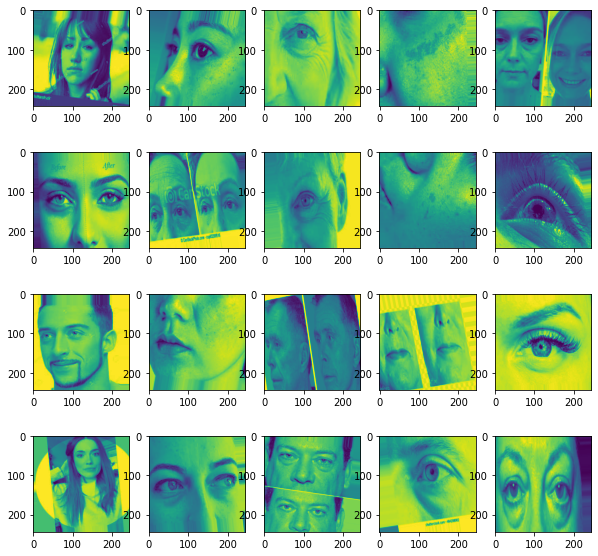

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(244,244))
plt.show()
    

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
target_train=to_categorical(target_train)

In [ ]:
target_train.shape

(1276, 4)

In [ ]:
features_train.shape

(1276, 244, 244, 1)

In [ ]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
conv_base=EfficientNetB0(weights="imagenet",include_top=False,input_shape=(244,244,3))
model=Sequential()
model.add(conv_base)
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(4,activation="sigmoid"))

16711680/16705208 [==============================] - 0s 0us/step


In [ ]:
from keras.optimizers import Adam

In [ ]:
model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
64/64 [==============================] - 42s 245ms/step - loss: 0.6764 - accuracy: 0.5625
Epoch 2/20
64/64 [==============================] - 15s 232ms/step - loss: 0.1860 - accuracy: 0.8651
Epoch 3/20
64/64 [==============================] - 15s 234ms/step - loss: 0.1448 - accuracy: 0.8930
Epoch 4/20
64/64 [==============================] - 15s 236ms/step - loss: 0.1142 - accuracy: 0.9296
Epoch 5/20
64/64 [==============================] - 15s 238ms/step - loss: 0.1122 - accuracy: 0.9268
Epoch 6/20
64/64 [==============================] - 15s 239ms/step - loss: 0.0801 - accuracy: 0.9467
Epoch 7/20
64/64 [==============================] - 15s 237ms/step - loss: 0.0909 - accuracy: 0.9426
Epoch 8/20
64/64 [==============================] - 15s 237ms/step - loss: 0.0631 - accuracy: 0.9665
Epoch 9/20
64/64 [==============================] - 15s 236ms/step - loss: 0.0584 - accuracy: 0.9675
Epoch 10/20
64/64 [==============================] - 15s 238ms/step - loss: 0.0778 - accura

In [ ]:
import numpy as np
import cv2

[0.01839489 0.89683807 0.00131886 0.01358343]
[0.01839489 0.89683807 0.00131886 0.01358343]
[0.01839489 0.89683807 0.00131886 0.01358343]
[0.01839489 0.89683807 0.00131886 0.01358343]


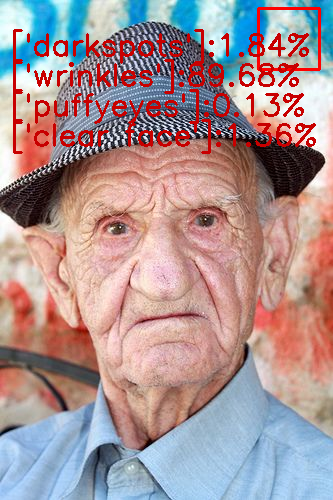

[4.9507832e-03 9.2261463e-01 5.3719420e-04 6.9406098e-03]
[4.9507832e-03 9.2261463e-01 5.3719420e-04 6.9406098e-03]
[4.9507832e-03 9.2261463e-01 5.3719420e-04 6.9406098e-03]
[4.9507832e-03 9.2261463e-01 5.3719420e-04 6.9406098e-03]


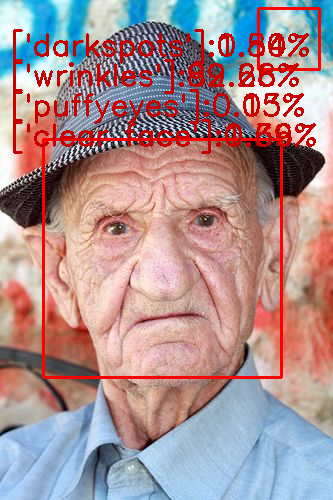

In [45]:
from google.colab.patches import cv2_imshow
import argparse

image=cv2.imread("/content/drive/MyDrive/03198defbf9905613bedbbdd2323228d.jpg")
imagearr=np.asarray(image)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +"haarcascade_frontalface_default.xml")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.05,5)
labels=np.array(['darkspots','wrinkles','puffyeyes','clear face'],dtype='object')
for (x,y,w,h) in faces:
    detectedFace=image[x:x+w,y:y+h]
    detectedFace=cv2.resize(detectedFace,(244,244))
    detectedFace=preprocessing(detectedFace)
    detectedFace=detectedFace.reshape(1,244,244,1)
    predictions=model.predict(detectedFace)[0]
     
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
    count =1
    for i in predictions:
       classname=labels[np.where(predictions==i)]
       accuracy=i*100
       label="{}:{:.2f}%".format(classname,accuracy)
       cv2.putText(image,label,(10,count *30+25),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,200),2)
       count +=1
       print(predictions)
    cv2_imshow(image)
    returnedValue=cv2.waitKey(1)
    if returnedValue==ord("s") or returnedValue==ord("S"):
       cv2.destroyAllWindows()
       break